In [1]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

### Load data

* NF boundary
* facts (planting locations)
* CA border
* A1 pixels = data from analysis 1

In [3]:
NF = gpd.read_file('/home/adam/cloud/gdrive/fire_project/local_data/study_area/ProclaimedForestBoundary/NationalForestLand_CA.shp')
facts = gpd.read_file('/home/adam/cloud/gdrive/fire_project/local_data/facts/facts_ca_110822.geojson',driver = "geojson")

In [5]:
NF.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [16]:
ca_border = gpd.read_file('/home/adam/cloud/gdrive/fire_project/local_data/ca-state-boundary/CA_State_TIGER2016.shp')

In [4]:
A1_pixels = pd.read_csv('A1_data.csv')

### Create geodataframe from A1 data

In [18]:
#Create geometry array
pixels = gpd.points_from_xy(A1_pixels.x, A1_pixels.y, crs= "EPSG:3310")

#save crs
crs3310 = pixels.crs

#Create geodataframe
A1_gdf = gpd.GeoDataFrame(A1_pixels, geometry = pixels)

### View data

<AxesSubplot: >

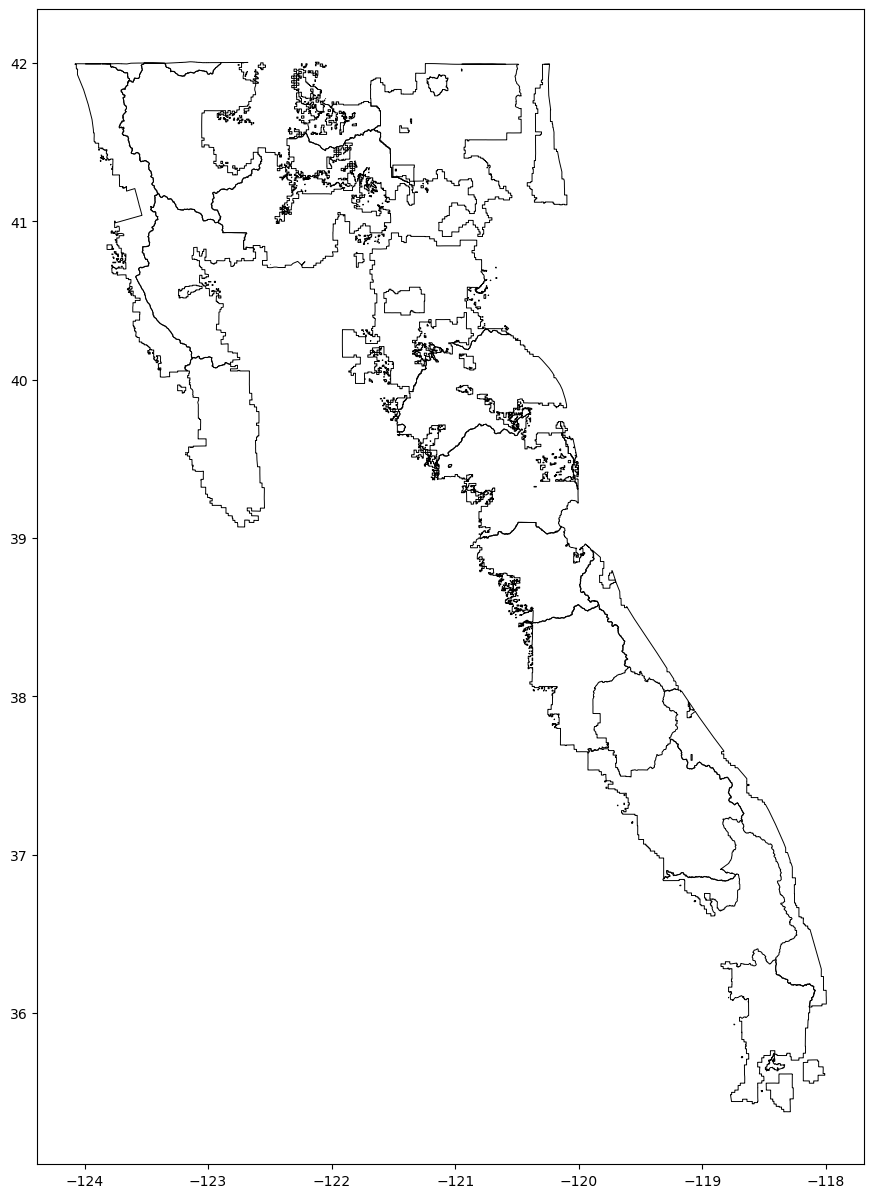

In [29]:
fig, ax = plt.subplots(figsize = (15,15))
NF.plot(ax = ax, facecolor = "none", edgecolor = "black", lw = 0.7)

<AxesSubplot: >

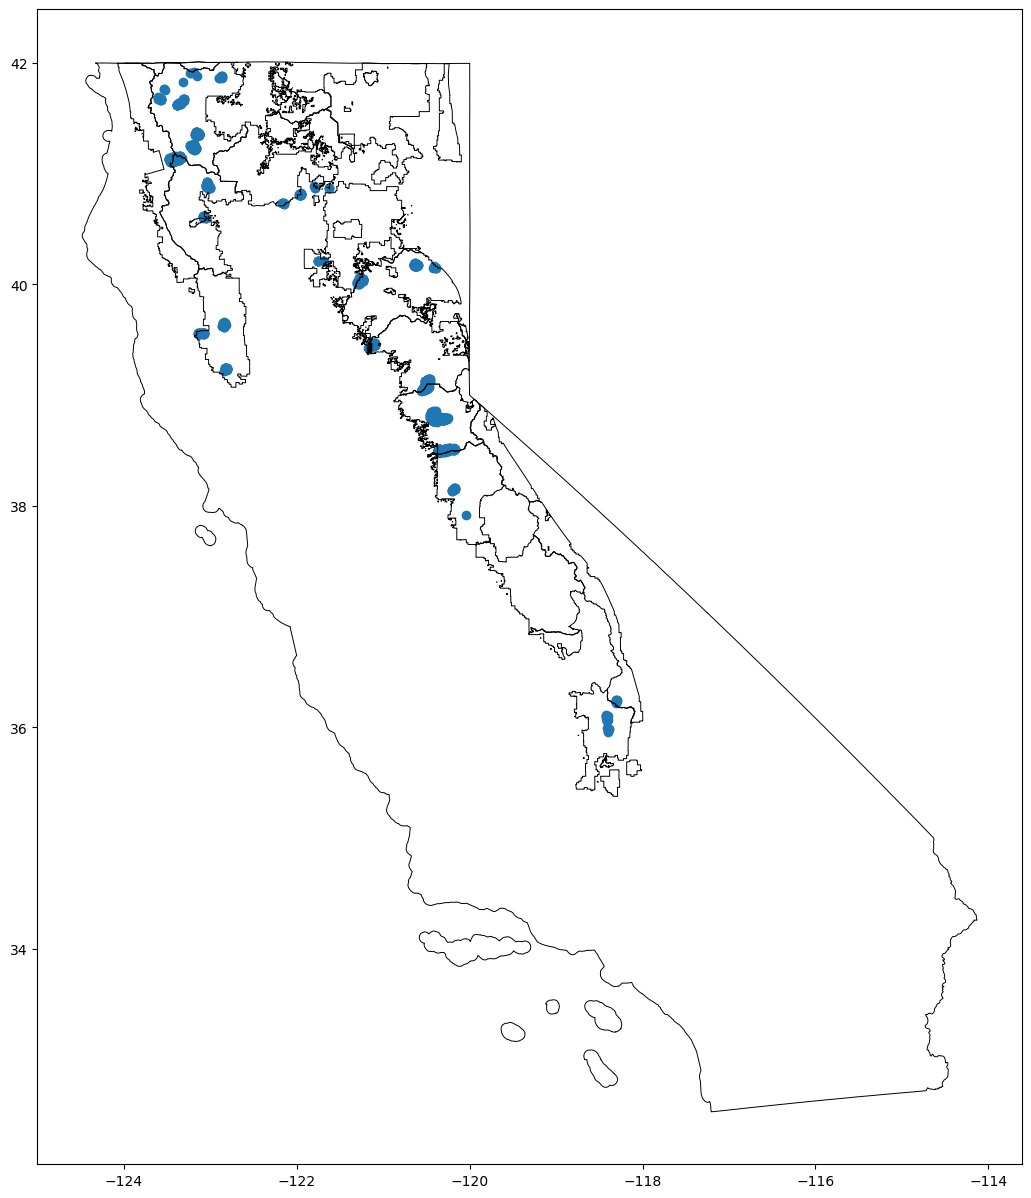

In [52]:
#Convert to facts crs
facts_crs = facts.crs
ca_border = ca_border.to_crs(facts_crs)
NF = NF.to_crs(facts_crs)
A1_gdf = A1_gdf.to_crs(facts_crs)

#plot data
fig, ax = plt.subplots(figsize=(15, 15))
ca_border.plot(ax = ax, facecolor="none", edgecolor='black', lw=0.7)
A1_gdf.plot(ax = ax)
NF.plot(ax = ax, facecolor = "none", edgecolor = "black", lw = 0.7)

### Filter A1 data to be inside NF land, but outside facts polygons

In [73]:
#Save A1 columns to select later
A1_cols = A1_gdf.columns

#Filter to just NF land
A1_gdf_NF = A1_gdf.sjoin(NF)[A1_cols]

#Filter to outside of facts
A1_gdf_facts = A1_gdf_NF.sjoin(facts,how='left')
keep = A1_gdf_facts.index_right.isnull()
A1_gdf_out = A1_gdf_facts.loc[keep,A1_cols]

### Plot filtered data

<AxesSubplot: >

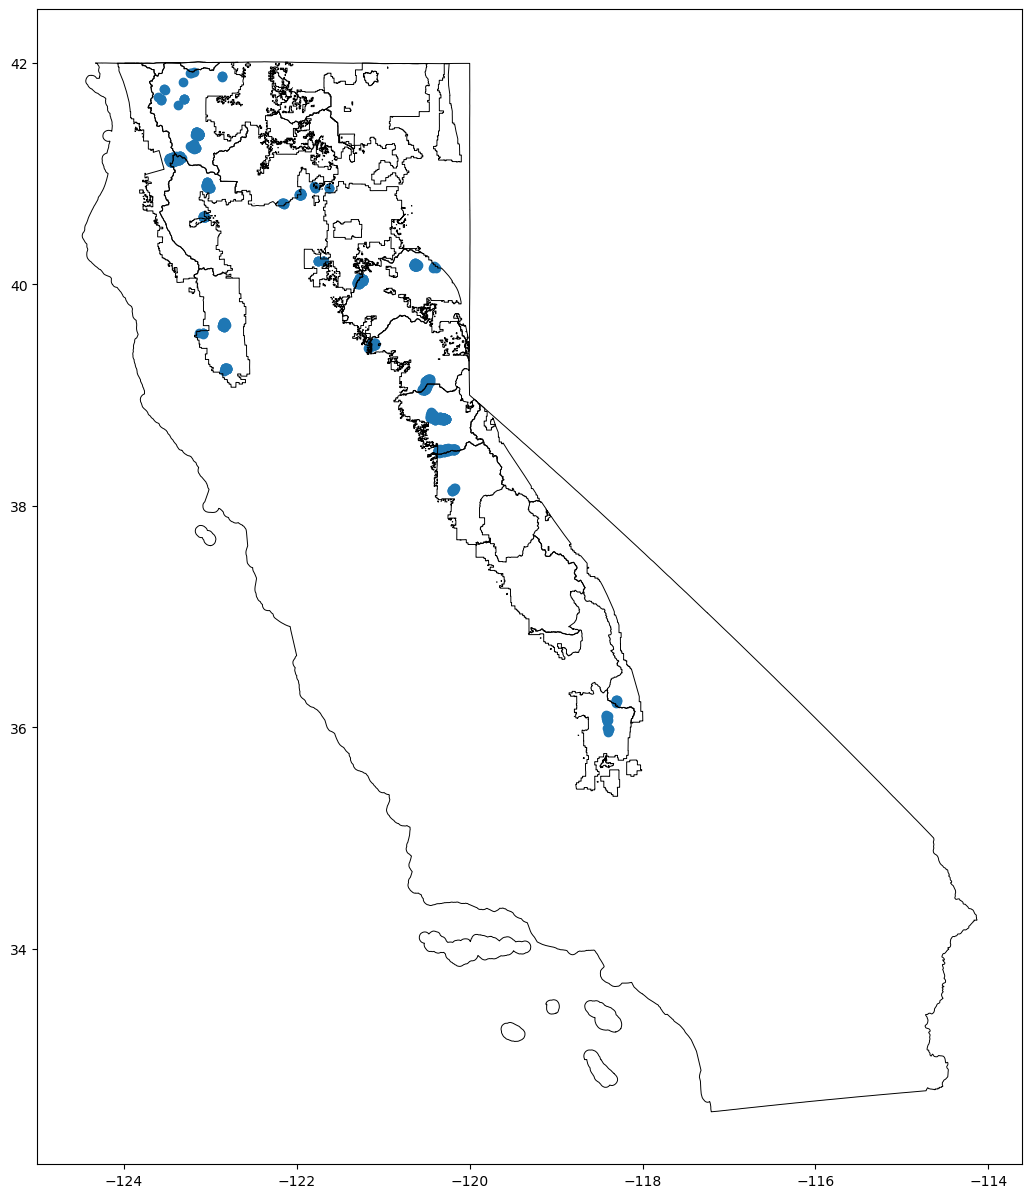

In [76]:
#plot data
fig, ax = plt.subplots(figsize=(15, 15))
ca_border.plot(ax = ax, facecolor="none", edgecolor='black', lw=0.7)
A1_gdf_out.plot(ax = ax)
NF.plot(ax = ax, facecolor = "none", edgecolor = "black", lw = 0.7)

### Export data

In [80]:
#as csv
#A1_gdf_out.to_csv("A1_data_with_A2_domain_020823.csv")

#export pixels as spatial data
#A1_gdf_out[['pixelID','geometry']].to_crs(crs3310).to_file("A1pixA2domain.geojson")